### Regularization

In some circumstances we might want to try a complex hypothesis on a small dataset.

In such a scenario bias will be low, but variance will be high.

In other words we will overfit.

But there are methods for avoiding overfitting by restricting the way in which $\mathcal{H}$ is explored.

If we explore $\mathcal{H}$ very conservatively maybe we can keep variance down while also keeping bias low.

---

### Early stopping

One easy way to reduce variance is to explore less of $\mathcal{H}$ during gradient descent or stochastic gradient descent.

This method is called *early stopping*.

We give an example below.



In [20]:
from sklearn.datasets import load_boston
import numpy as np

X, y = load_boston(return_X_y=True)
shuff = np.random.permutation(X.shape[0])
X = X[shuff]
y = y[shuff]

In [21]:
from sklearn.model_selection import train_test_split
#np.random.seed(54634)#389247 #654654321
rs = np.random.randint(100000)
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=rs)

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
X_train = np.c_[np.ones(X_train.shape[0]),X_train]
X_test = np.c_[np.ones(X_test.shape[0]),X_test]
X_train.shape,X_test.shape

((379, 14), (127, 14))

In [22]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train,y_train)
reg.score(X_test,y_test), reg.score(X_train,y_train)

(0.7443930892271237, 0.7319344630386133)

In [23]:
import mystuff as ms
from sklearn.metrics import r2_score as R2
from sklearn.metrics import mean_squared_error as MSE
import numpy as np

def mse(w,X,y):
    return 1/X.shape[0]*(w.T.dot(X.T).dot(X).dot(w)-2*w.T.dot(X.T).dot(y)+y.dot(y))

def mse_gradient(w,X,y):
    return 2/X.shape[0]*(X.T.dot(X).dot(w)-X.T.dot(y))

w_init = np.random.randn(X_train.shape[1])

wgd,path = ms.grad_descent(w_init,X_train,y_train,mse_gradient,eta=0.07,max_iter=10000)

y_test_hat = X_test.dot(wgd)

print("w (gradient descent) = {}".format(wgd))
print("R2 (gradient descent)= {}".format(R2(y_test,y_test_hat)))

w (gradient descent) = [ 28.80321892 -10.83436169   4.32149668   0.80869171   2.28699621
  -8.45605225  15.79126244  -0.85644796 -15.28751321   6.49199518
  -5.92724429  -9.28384746   3.1803015  -18.47833904]
R2 (gradient descent)= 0.7444570541099567


In [24]:
test_scores = [mse(w,X_test,y_test) for w in path]
train_scores = [mse(w,X_train,y_train) for w in path]

R2test_scores = [R2(X_test.dot(w),y_test) for w in path]
R2train_scores = [R2(X_train.dot(w),y_train) for w in path]

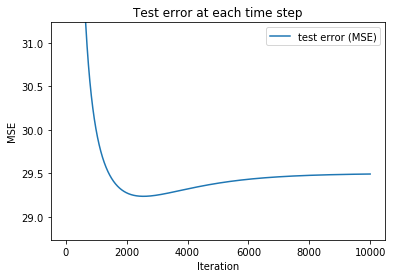

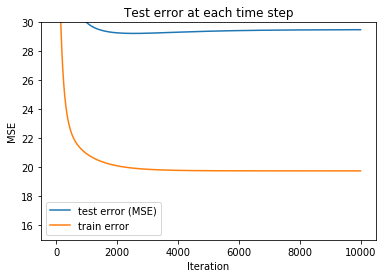

In [25]:
import matplotlib.pyplot as plt

dom = range(len(test_scores))

plt.ylim(min(test_scores)-0.5,min(test_scores)+2)
plt.plot(dom,test_scores,label="test error (MSE)")

#plt.plot(dom,train_scores,label="train error")
plt.legend()
plt.title("Test error at each time step")
plt.ylabel("MSE")
plt.xlabel("Iteration")
plt.show()


plt.ylim(15,30)
#plt.plot(dom,R2test_scores,label="test error (R2)")
plt.plot(dom,test_scores,label="test error (MSE)")
plt.plot(dom,train_scores,label="train error")
plt.legend()
plt.title("Test error at each time step")
plt.ylabel("MSE")
plt.xlabel("Iteration")
plt.show()

In [26]:
best_stop = np.argmin(test_scores)
best_w = path[best_stop]
print(best_stop)
mse(best_w,X_test,y_test),mse(best_w,X_train,y_train)
#R2(X_test.dot(best_w),y_test),R2(X_train.dot(best_w),y_train)

2553


(29.23689255089587, 19.93821861400058)

In [27]:
last_w = path[-1]
mse(last_w,X_test,y_test)

29.493187198303566

### Best stopping time

The results above show that test error is minimized when we reach the 2553rd iteration of gradient descent (with these parameters).

Note that this only applies to MSE in this example.

We could easily automate the selection of this best parameter (in fact we kind of did).

Also note that we "snooped" on the test set when we found the best $g \in \mathcal{H}$.  

Now if we want to predict the true $E_{out}(g)$ we should use a reserve set of data (the validation set).